## Assignment-2
Column A represents SKUs of a particular category

All subsequent columns represent daily sales volume

Using this data please answer the below questions

1) What is the monthly & quaterly sales data by SKU

2) Which are the top 3 months in terms of overall sales

3) Which SKUs are outliers in terms sales in any month

#### Loading the Libraries

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading/Reading the Dataset

In [2]:
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)
df = pd.read_excel("MS2.xlsx",delimiter=' ')

#### Displaying the First and Last 5 Rows of the Dataset

In [3]:
df.head()

,SKU,2019-08-01 00:00:00,2019-08-02 00:00:00,2019-08-03 00:00:00,2019-08-04 00:00:00,2019-08-05 00:00:00,2019-08-06 00:00:00,2019-08-07 00:00:00,2019-08-08 00:00:00,2019-08-09 00:00:00,2019-08-10 00:00:00,2019-08-11 00:00:00,2019-08-12 00:00:00,2019-08-13 00:00:00,2019-08-14 00:00:00,2019-08-15 00:00:00,2019-08-16 00:00:00,2019-08-17 00:00:00,2019-08-18 00:00:00,2019-08-19 00:00:00,2019-08-20 00:00:00,2019-08-21 00:00:00,2019-08-22 00:00:00,2019-08-23 00:00:00,2019-08-24 00:00:00,2019-08-25 00:00:00,2019-08-26 00:00:00,2019-08-27 00:00:00,2019-08-28 00:00:00,2019-08-29 00:00:00,2019-08-30 00:00:00,2019-08-31 00:00:00,2019-09-01 00:00:00,2019-09-02 00:00:00,2019-09-03 00:00:00,2019-09-04 00:00:00,2019-09-05 00:00:00,2019-09-06 00:00:00,2019-09-07 00:00:00,2019-09-08 00:00:00,2019-09-09 00:00:00,2019-09-10 00:00:00,2019-09-11 00:00:00,2019-09-12 00:00:00,2019-09-13 00:00:00,2019-09-14 00:00:00,2019-09-15 00:00:00,2019-09-16 00:00:00,2019-09-17 00:00:00,2019-09-18 00:00:00,2019-09-19 00:00:00,2019-09-20 00:00:00,2019-09-21 00:00:00,2019-09-22 00:00:00,2019-09-23 00:00:00,2019-09-24 00:00:00,2019-09-25 00:00:00,2019-09-26 00:00:00,2019-09-27 00:00:00,2019-09-28 00:00:00,2019-09-29 00:00:00,2019-09-30 00:00:00,2019-10-01 00:00:00,2019-10-02 00:00:00,2019-10-03 00:00:00,2019-10-04 00:00:00,2019-10-05 00:00:00,2019-10-06 00:00:00,2019-10-07 00:00:00,2019-10-08 00:00:00,2019-10-09 00:00:00,2019-10-10 00:00:00,2019-10-11 00:00:00,2019-10-12 00:00:00,2019-10-13 00:00:00,2019-10-14 00:00:00,2019-10-15 00:00:00,2019-10-16 00:00:00,2019-10-17 00:00:00,2019-10-18 00:00:00,2019-10-19 00:00:00,2019-10-20 00:00:00,2019-10-21 00:00:00,2019-10-22 00:00:00,2019-10-23 00:00:00,2019-10-24 00:00:00,2019-10-25 00:00:00,2019-10-26 00:00:00,2019-10-27 00:00:00,2019-10-28 00:00:00,2019-10-29 00:00:00,2019-10-30 00:00:00,2019-10-31 00:00:00,2019-11-01 00:00:00,2019-11-02 00:00:00,2019-11-03 00:00:00,2019-11-04 00:00:00,2019-11-05 00:00:00,2019-11-06 00:00:00,2019-11-07 00:00:00,2019-11-08 00:00:00,2019-11-09 00:00:00,2019-11-10 00:00:00,2019-11-11 00:00:00,2019-11-12 00:00:00,2019-11-13 00:00:00,2019-11-14 00:00:00,2019-11-15 00:00:00,2019-11-16 00:00:00,2019-11-17 00:00:00,2019-11-18 00:00:00,2019-11-19 00:00:00,2019-11-20 00:00:00,2019-11-21 00:00:00,2019-11-22 00:00:00,2019-11-23 00:00:00,2019-11-24 00:00:00,2019-11-25 00:00:00,2019-11-26 00:00:00,2019-11-27 00:00:00,2019-11-28 00:00:00,2019-11-29 00:00:00,2019-11-30 00:00:00,2019-12-01 00:00:00,2019-12-02 00:00:00,2019-12-03 00:00:00,2019-12-04 00:00:00,2019-12-05 00:00:00,2019-12-06 00:00:00,2019-12-07 00:00:00,2019-12-08 00:00:00,2019-12-09 00:00:00,2019-12-10 00:00:00,2019-12-11 00:00:00,2019-12-12 00:00:00,2019-12-13 00:00:00,2019-12-14 00:00:00,2019-12-15 00:00:00,2019-12-16 00:00:00,2019-12-17 00:00:00,2019-12-18 00:00:00,2019-12-19 00:00:00,2019-12-20 00:00:00,2019-12-21 00:00:00,2019-12-22 00:00:00,2019-12-23 00:00:00,2019-12-24 00:00:00,2019-12-25 00:00:00,2019-12-26 00:00:00,2019-12-27 00:00:00,2019-12-28 00:00:00,2019-12-29 00:00:00,2019-12-30 00:00:00,2019-12-31 00:00:00,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,2020-01-11 00:00:00,2020-01-12 00:00:00,2020-01-13 00:00:00,2020-01-14 00:00:00,2020-01-15 00:00:00,2020-01-16 00:00:00,2020-01-17 00:00:00,2020-01-18 00:00:00,2020-01-19 00:00:00,2020-01-20 00:00:00,2020-01-21 00:00:00,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-08 00:00:00,2020-02-09 00:00:00,2020-02-10 00:00:00,2020-02-11 00:00:00,2020-02-12 00:00:00,2020-02-13 00:00:00,2020-02-14 00:00:00,2020-02-15 00:00:00,2020-02-16 00:0

In [4]:
df.tail()

,SKU,2019-08-01 00:00:00,2019-08-02 00:00:00,2019-08-03 00:00:00,2019-08-04 00:00:00,2019-08-05 00:00:00,2019-08-06 00:00:00,2019-08-07 00:00:00,2019-08-08 00:00:00,2019-08-09 00:00:00,2019-08-10 00:00:00,2019-08-11 00:00:00,2019-08-12 00:00:00,2019-08-13 00:00:00,2019-08-14 00:00:00,2019-08-15 00:00:00,2019-08-16 00:00:00,2019-08-17 00:00:00,2019-08-18 00:00:00,2019-08-19 00:00:00,2019-08-20 00:00:00,2019-08-21 00:00:00,2019-08-22 00:00:00,2019-08-23 00:00:00,2019-08-24 00:00:00,2019-08-25 00:00:00,2019-08-26 00:00:00,2019-08-27 00:00:00,2019-08-28 00:00:00,2019-08-29 00:00:00,2019-08-30 00:00:00,2019-08-31 00:00:00,2019-09-01 00:00:00,2019-09-02 00:00:00,2019-09-03 00:00:00,2019-09-04 00:00:00,2019-09-05 00:00:00,2019-09-06 00:00:00,2019-09-07 00:00:00,2019-09-08 00:00:00,2019-09-09 00:00:00,2019-09-10 00:00:00,2019-09-11 00:00:00,2019-09-12 00:00:00,2019-09-13 00:00:00,2019-09-14 00:00:00,2019-09-15 00:00:00,2019-09-16 00:00:00,2019-09-17 00:00:00,2019-09-18 00:00:00,2019-09-19 00:00:00,2019-09-20 00:00:00,2019-09-21 00:00:00,2019-09-22 00:00:00,2019-09-23 00:00:00,2019-09-24 00:00:00,2019-09-25 00:00:00,2019-09-26 00:00:00,2019-09-27 00:00:00,2019-09-28 00:00:00,2019-09-29 00:00:00,2019-09-30 00:00:00,2019-10-01 00:00:00,2019-10-02 00:00:00,2019-10-03 00:00:00,2019-10-04 00:00:00,2019-10-05 00:00:00,2019-10-06 00:00:00,2019-10-07 00:00:00,2019-10-08 00:00:00,2019-10-09 00:00:00,2019-10-10 00:00:00,2019-10-11 00:00:00,2019-10-12 00:00:00,2019-10-13 00:00:00,2019-10-14 00:00:00,2019-10-15 00:00:00,2019-10-16 00:00:00,2019-10-17 00:00:00,2019-10-18 00:00:00,2019-10-19 00:00:00,2019-10-20 00:00:00,2019-10-21 00:00:00,2019-10-22 00:00:00,2019-10-23 00:00:00,2019-10-24 00:00:00,2019-10-25 00:00:00,2019-10-26 00:00:00,2019-10-27 00:00:00,2019-10-28 00:00:00,2019-10-29 00:00:00,2019-10-30 00:00:00,2019-10-31 00:00:00,2019-11-01 00:00:00,2019-11-02 00:00:00,2019-11-03 00:00:00,2019-11-04 00:00:00,2019-11-05 00:00:00,2019-11-06 00:00:00,2019-11-07 00:00:00,2019-11-08 00:00:00,2019-11-09 00:00:00,2019-11-10 00:00:00,2019-11-11 00:00:00,2019-11-12 00:00:00,2019-11-13 00:00:00,2019-11-14 00:00:00,2019-11-15 00:00:00,2019-11-16 00:00:00,2019-11-17 00:00:00,2019-11-18 00:00:00,2019-11-19 00:00:00,2019-11-20 00:00:00,2019-11-21 00:00:00,2019-11-22 00:00:00,2019-11-23 00:00:00,2019-11-24 00:00:00,2019-11-25 00:00:00,2019-11-26 00:00:00,2019-11-27 00:00:00,2019-11-28 00:00:00,2019-11-29 00:00:00,2019-11-30 00:00:00,2019-12-01 00:00:00,2019-12-02 00:00:00,2019-12-03 00:00:00,2019-12-04 00:00:00,2019-12-05 00:00:00,2019-12-06 00:00:00,2019-12-07 00:00:00,2019-12-08 00:00:00,2019-12-09 00:00:00,2019-12-10 00:00:00,2019-12-11 00:00:00,2019-12-12 00:00:00,2019-12-13 00:00:00,2019-12-14 00:00:00,2019-12-15 00:00:00,2019-12-16 00:00:00,2019-12-17 00:00:00,2019-12-18 00:00:00,2019-12-19 00:00:00,2019-12-20 00:00:00,2019-12-21 00:00:00,2019-12-22 00:00:00,2019-12-23 00:00:00,2019-12-24 00:00:00,2019-12-25 00:00:00,2019-12-26 00:00:00,2019-12-27 00:00:00,2019-12-28 00:00:00,2019-12-29 00:00:00,2019-12-30 00:00:00,2019-12-31 00:00:00,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,2020-01-11 00:00:00,2020-01-12 00:00:00,2020-01-13 00:00:00,2020-01-14 00:00:00,2020-01-15 00:00:00,2020-01-16 00:00:00,2020-01-17 00:00:00,2020-01-18 00:00:00,2020-01-19 00:00:00,2020-01-20 00:00:00,2020-01-21 00:00:00,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-08 00:00:00,2020-02-09 00:00:00,2020-02-10 00:00:00,2020-02-11 00:00:00,2020-02-12 00:00:00,2020-02-13 00:00:00,2020-02-14 00:00:00,2020-02-15 00:00:00,2020-02-16 00:0

#### Displaying Basic Information of the Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Columns: 367 entries, SKU to 2020-07-31 00:00:00
dtypes: int64(366), object(1)
memory usage: 708.3+ KB


#### Displaying the Basic Statistics Summary of the Dataset

In [6]:
df.describe()

,2019-08-01 00:00:00,2019-08-02 00:00:00,2019-08-03 00:00:00,2019-08-04 00:00:00,2019-08-05 00:00:00,2019-08-06 00:00:00,2019-08-07 00:00:00,2019-08-08 00:00:00,2019-08-09 00:00:00,2019-08-10 00:00:00,2019-08-11 00:00:00,2019-08-12 00:00:00,2019-08-13 00:00:00,2019-08-14 00:00:00,2019-08-15 00:00:00,2019-08-16 00:00:00,2019-08-17 00:00:00,2019-08-18 00:00:00,2019-08-19 00:00:00,2019-08-20 00:00:00,2019-08-21 00:00:00,2019-08-22 00:00:00,2019-08-23 00:00:00,2019-08-24 00:00:00,2019-08-25 00:00:00,2019-08-26 00:00:00,2019-08-27 00:00:00,2019-08-28 00:00:00,2019-08-29 00:00:00,2019-08-30 00:00:00,2019-08-31 00:00:00,2019-09-01 00:00:00,2019-09-02 00:00:00,2019-09-03 00:00:00,2019-09-04 00:00:00,2019-09-05 00:00:00,2019-09-06 00:00:00,2019-09-07 00:00:00,2019-09-08 00:00:00,2019-09-09 00:00:00,2019-09-10 00:00:00,2019-09-11 00:00:00,2019-09-12 00:00:00,2019-09-13 00:00:00,2019-09-14 00:00:00,2019-09-15 00:00:00,2019-09-16 00:00:00,2019-09-17 00:00:00,2019-09-18 00:00:00,2019-09-19 00:00:00,2019-09-20 00:00:00,2019-09-21 00:00:00,2019-09-22 00:00:00,2019-09-23 00:00:00,2019-09-24 00:00:00,2019-09-25 00:00:00,2019-09-26 00:00:00,2019-09-27 00:00:00,2019-09-28 00:00:00,2019-09-29 00:00:00,2019-09-30 00:00:00,2019-10-01 00:00:00,2019-10-02 00:00:00,2019-10-03 00:00:00,2019-10-04 00:00:00,2019-10-05 00:00:00,2019-10-06 00:00:00,2019-10-07 00:00:00,2019-10-08 00:00:00,2019-10-09 00:00:00,2019-10-10 00:00:00,2019-10-11 00:00:00,2019-10-12 00:00:00,2019-10-13 00:00:00,2019-10-14 00:00:00,2019-10-15 00:00:00,2019-10-16 00:00:00,2019-10-17 00:00:00,2019-10-18 00:00:00,2019-10-19 00:00:00,2019-10-20 00:00:00,2019-10-21 00:00:00,2019-10-22 00:00:00,2019-10-23 00:00:00,2019-10-24 00:00:00,2019-10-25 00:00:00,2019-10-26 00:00:00,2019-10-27 00:00:00,2019-10-28 00:00:00,2019-10-29 00:00:00,2019-10-30 00:00:00,2019-10-31 00:00:00,2019-11-01 00:00:00,2019-11-02 00:00:00,2019-11-03 00:00:00,2019-11-04 00:00:00,2019-11-05 00:00:00,2019-11-06 00:00:00,2019-11-07 00:00:00,2019-11-08 00:00:00,2019-11-09 00:00:00,2019-11-10 00:00:00,2019-11-11 00:00:00,2019-11-12 00:00:00,2019-11-13 00:00:00,2019-11-14 00:00:00,2019-11-15 00:00:00,2019-11-16 00:00:00,2019-11-17 00:00:00,2019-11-18 00:00:00,2019-11-19 00:00:00,2019-11-20 00:00:00,2019-11-21 00:00:00,2019-11-22 00:00:00,2019-11-23 00:00:00,2019-11-24 00:00:00,2019-11-25 00:00:00,2019-11-26 00:00:00,2019-11-27 00:00:00,2019-11-28 00:00:00,2019-11-29 00:00:00,2019-11-30 00:00:00,2019-12-01 00:00:00,2019-12-02 00:00:00,2019-12-03 00:00:00,2019-12-04 00:00:00,2019-12-05 00:00:00,2019-12-06 00:00:00,2019-12-07 00:00:00,2019-12-08 00:00:00,2019-12-09 00:00:00,2019-12-10 00:00:00,2019-12-11 00:00:00,2019-12-12 00:00:00,2019-12-13 00:00:00,2019-12-14 00:00:00,2019-12-15 00:00:00,2019-12-16 00:00:00,2019-12-17 00:00:00,2019-12-18 00:00:00,2019-12-19 00:00:00,2019-12-20 00:00:00,2019-12-21 00:00:00,2019-12-22 00:00:00,2019-12-23 00:00:00,2019-12-24 00:00:00,2019-12-25 00:00:00,2019-12-26 00:00:00,2019-12-27 00:00:00,2019-12-28 00:00:00,2019-12-29 00:00:00,2019-12-30 00:00:00,2019-12-31 00:00:00,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,2020-01-11 00:00:00,2020-01-12 00:00:00,2020-01-13 00:00:00,2020-01-14 00:00:00,2020-01-15 00:00:00,2020-01-16 00:00:00,2020-01-17 00:00:00,2020-01-18 00:00:00,2020-01-19 00:00:00,2020-01-20 00:00:00,2020-01-21 00:00:00,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-08 00:00:00,2020-02-09 00:00:00,2020-02-10 00:00:00,2020-02-11 00:00:00,2020-02-12 00:00:00,2020-02-13 00:00:00,2020-02-14 00:00:00,2020-02-15 00:00:00,2020-02-16 00:00:00

#### Checking Shape of the Dataset (Rows,Columns)

In [7]:
df.shape

(247, 367)

#### Checking for Null Values

In [56]:
df.isnull().sum().sum() # No missing values

0

#### Names of Columns

In [8]:
df.columns

Index([              'SKU', 2019-08-01 00:00:00, 2019-08-02 00:00:00, 2019-08-03 00:00:00, 2019-08-04 00:00:00, 2019-08-05 00:00:00, 2019-08-06 00:00:00, 2019-08-07 00:00:00, 2019-08-08 00:00:00, 2019-08-09 00:00:00,
       ...
       2020-07-22 00:00:00, 2020-07-23 00:00:00, 2020-07-24 00:00:00, 2020-07-25 00:00:00, 2020-07-26 00:00:00, 2020-07-27 00:00:00, 2020-07-28 00:00:00, 2020-07-29 00:00:00, 2020-07-30 00:00:00, 2020-07-31 00:00:00], dtype='object', length=367)

#### Cleaning the Dataset

In [ ]:
# Monthly Sales

In [9]:
aug = df.iloc[0:, 1:32]
sept = df.iloc[0:,32:62]
october = df.iloc[0:,62:93]
nov = df.iloc[0:,93:123]
dec = df.iloc[0:,123:154]
jan = df.iloc[0:,154:185]
feb = df.iloc[0:,185:214]
march = df.iloc[0:,214:245]
april = df.iloc[0:,245:275]
may = df.iloc[0:,275:306]
june = df.iloc[0:,306:336]
july = df.iloc[0:,336:367]

In [10]:
august_sales = aug.sum(axis = 1,skipna=True)
september_sales = sept.sum(axis = 1,skipna=True)
october_sales = october.sum(axis = 1,skipna=True)
november_sales = nov.sum(axis = 1,skipna=True)
december_sales = dec.sum(axis = 1,skipna=True)
january_sales = jan.sum(axis = 1,skipna=True)
february_sales = feb.sum(axis = 1,skipna=True)
march_sales = march.sum(axis = 1,skipna=True)
april_sales = april.sum(axis = 1,skipna=True)
may_sales = may.sum(axis = 1,skipna=True)
june_sales = june.sum(axis = 1,skipna=True)
july_sales = july.sum(axis = 1,skipna=True)
SKU = df.SKU

In [11]:
one = pd.DataFrame(august_sales,columns=["August_Sales"])
two = pd.DataFrame(september_sales,columns=["September_Sales"])
three = pd.DataFrame(october_sales,columns=["October_Sales"])
four = pd.DataFrame(november_sales,columns=["November_Sales"])
five = pd.DataFrame(december_sales,columns=["December_Sales"])
six = pd.DataFrame(january_sales,columns=["January_Sales"])
seven = pd.DataFrame(february_sales,columns=["February_Sales"])
eight = pd.DataFrame(march_sales,columns=["March_Sales"])
nine = pd.DataFrame(april_sales,columns=["April_Sales"])
ten = pd.DataFrame(may_sales,columns=["May_Sales"])
eleven = pd.DataFrame(june_sales,columns=["June_Sales"])
twelve = pd.DataFrame(july_sales,columns=["July_Sales"])
sku = pd.DataFrame(SKU,columns=["SKU"])

In [12]:
data = pd.concat([sku,one,two,three,four,five,six,seven,eight,nine,ten,eleven,twelve],axis=1)

In [13]:
data.shape

(247, 13)

In [48]:
data.head()

,SKU,August_Sales,September_Sales,October_Sales,November_Sales,December_Sales,January_Sales,February_Sales,March_Sales,April_Sales,May_Sales,June_Sales,July_Sales
0,2527,41702,36880,30582,21916,23804,21853,23170,30956,38202,44347,49341,55826
1,3042,69451,62415,71082,83246,87899,79546,78095,92606,120947,135342,157482,196062
2,3086,27412,31687,33122,28937,33444,35670,32029,30827,25062,22231,24184,26153
3,3155,46443,41922,45421,55371,72253,75218,61235,72241,67543,57518,53480,54253
4,3166,10720,10306,11966,13094,13848,13990,10517,9587,12110,9838,9076,10182


In [ ]:
# According to the available data, We can find out Q3-2019, Q4-2019, Q1-2020, Q2-2020, Q3-2020

In [28]:
Q3_2019 = data.iloc[0:, 1:3] # August & September 2019
Q4_2019 = data.iloc[0:,3:6] # October, November & December 2019
Q1_2020 = data.iloc[0:, 6:9] # January, February & March 
Q2_2020 = data.iloc[0:, 9:12] # April, May and June 2020
Q3_2020 = data.iloc[0:, 12:] # July 2020

In [31]:
Q3_2019_sales = Q3_2019.sum(axis=1,skipna=True)
Q4_2019_sales = Q4_2019.sum(axis=1,skipna=True)
Q1_2020_sales = Q1_2020.sum(axis=1,skipna=True)
Q2_2020_sales = Q2_2020.sum(axis=1,skipna=True)
Q3_2020_sales = Q3_2020.sum(axis=1,skipna=True)

In [36]:
thirteen = pd.DataFrame(Q3_2019_sales,columns=["Q3_2019_Sales"])
fourteen = pd.DataFrame(Q4_2019_sales,columns=["Q4_2019_Sales"])
fifteen = pd.DataFrame(Q1_2020_sales,columns=["Q1_2020_Sales"])
sixteen = pd.DataFrame(Q2_2020_sales,columns=["Q2_2020_Sales"])
seventeen = pd.DataFrame(Q3_2020_sales,columns=["Q3_2020_Sales"])

In [37]:
df1 = pd.concat([data,thirteen,fourteen,fifteen,sixteen,seventeen],axis=1)

### Answer1 - What is the monthly & quaterly sales data by SKU

In [69]:
df1 # ANSWER 1

,SKU,August_Sales,September_Sales,October_Sales,November_Sales,December_Sales,January_Sales,February_Sales,March_Sales,April_Sales,May_Sales,June_Sales,July_Sales,Q3_2019_Sales,Q4_2019_Sales,Q1_2020_Sales,Q2_2020_Sales,Q3_2020_Sales
0,2527,41702,36880,30582,21916,23804,21853,23170,30956,38202,44347,49341,55826,78582,76302,75979,131890,55826
1,3042,69451,62415,71082,83246,87899,79546,78095,92606,120947,135342,157482,196062,131866,242227,250247,413771,196062
2,3086,27412,31687,33122,28937,33444,35670,32029,30827,25062,22231,24184,26153,59099,95503,98526,71477,26153
3,3155,46443,41922,45421,55371,72253,75218,61235,72241,67543,57518,53480,54253,88365,173045,208694,178541,54253
4,3166,10720,10306,11966,13094,13848,13990,10517,9587,12110,9838,9076,10182,21026,38908,34094,31024,10182
5,8272,31559,35877,35109,35407,22536,16265,14922,18244,24042,33069,22895,20594,67436,93052,49431,80006,20594
6,9311,19045,17797,14797,11495,9002,8532,7193,8971,9115,10741,8341,6834,36842,35294,24696,28197,6834
7,13159,1822,1990,1857,1853,2051,2297,2001,1967,1800,1447,1087,1150,3812,5761,6265,4334,1150
8,13160,1485,1753,2045,1445,1272,1248,1154,949,845,1062,1261,1168,3238,4762,3351,3168,1168
9,14011,186,180,186,180,186,186,174,186,180,186,180,186,366,552,546,546,186


### Answer2 - Which are the top 3 months in terms of overall sales

In [68]:
data.sum(axis=0,skipna=True).sort_values(ascending=False)

March_Sales        20234570
December_Sales     19536270
January_Sales      19170099
April_Sales        19103472
July_Sales         18795771
May_Sales          18555947
June_Sales         18303531
October_Sales      18300108
February_Sales     17973457
November_Sales     17954015
September_Sales    17309331
August_Sales       16590204
dtype: int64

In [51]:
data.sum(axis=0,skipna=True).sort_values(ascending=False).head(3) # Top 3 Months

March_Sales       20234570
December_Sales    19536270
January_Sales     19170099
dtype: int64

### Answer3 - Which SKUs are outliers in terms sales in any month

Here, I am going to make a function to perform Univariate Analysis of all the columns at once and show the number of SKU's which are outliers in each month with some visualizations. I will apply this function on the copy of this data.

In [61]:
def eda(col):
    print("************************************Univariate Analysis**************************************************")
    print()
    print()
    print(col.describe())
    print()
    print()
    fig = plt.figure(figsize=(30,5))
    plt.subplot(131)
    sns.boxplot(col)
    plt.subplot(132)    
    sns.distplot(col)    
    plt.subplot(133)
    sns.violinplot(x = col)
    plt.show()
    print()
    print()
    IQR=col.quantile(0.75)-col.quantile(0.25)
    Lower_Limit=col.quantile(0.25)-1.5*IQR
    Upper_Limit=col.quantile(0.75)+1.5*IQR
    print("Total no. of entries : ",len(col))
    print()
    print("The value for left whisker = ",Lower_Limit)
    print()
    print("Datapoints before left whisker : ")
    print((col<Lower_Limit).value_counts())
    print()
    print("The value for right whisker = ",Upper_Limit)
    print()
    print("Datapoints before right whisker : ")
    print((col>Upper_Limit).value_counts())
    print()

In [63]:
copy_data=data.copy()

In [66]:
copy_data = copy_data.drop("SKU",axis=1)

************************************Univariate Analysis**************************************************


count    2.470000e+02
mean     6.716682e+04
std      2.235068e+05
min      3.100000e+01
25%      5.840000e+02
50%      3.885000e+03
75%      4.162950e+04
max      2.777157e+06
Name: August_Sales, dtype: float64




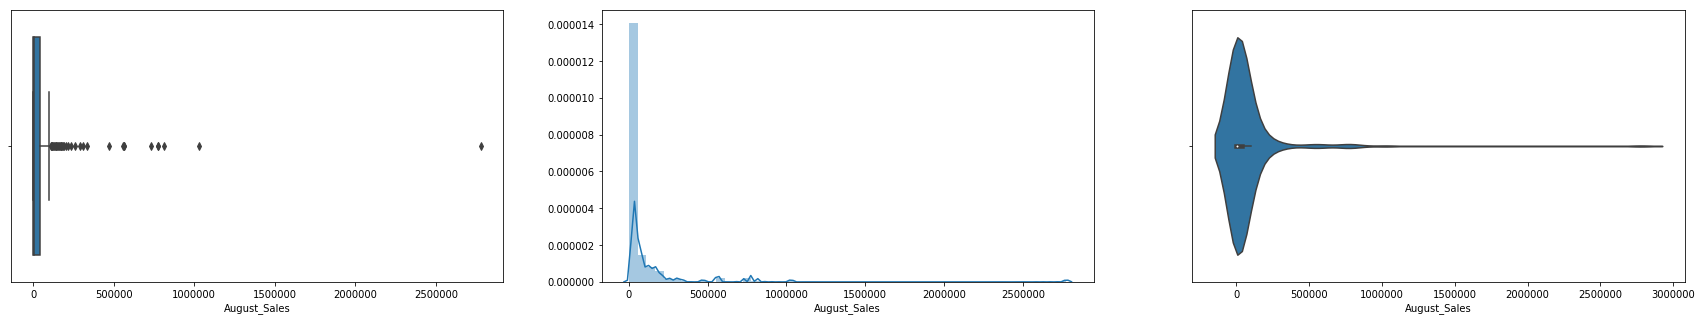



Total no. of entries :  247

The value for left whisker =  -60984.25

Datapoints before left whisker : 
False    247
Name: August_Sales, dtype: int64

The value for right whisker =  103197.75

Datapoints before right whisker : 
False    212
True      35
Name: August_Sales, dtype: int64

************************************Univariate Analysis**************************************************


count    2.470000e+02
mean     7.007826e+04
std      2.575223e+05
min      3.000000e+01
25%      5.835000e+02
50%      3.482000e+03
75%      4.025250e+04
max      3.361132e+06
Name: September_Sales, dtype: float64




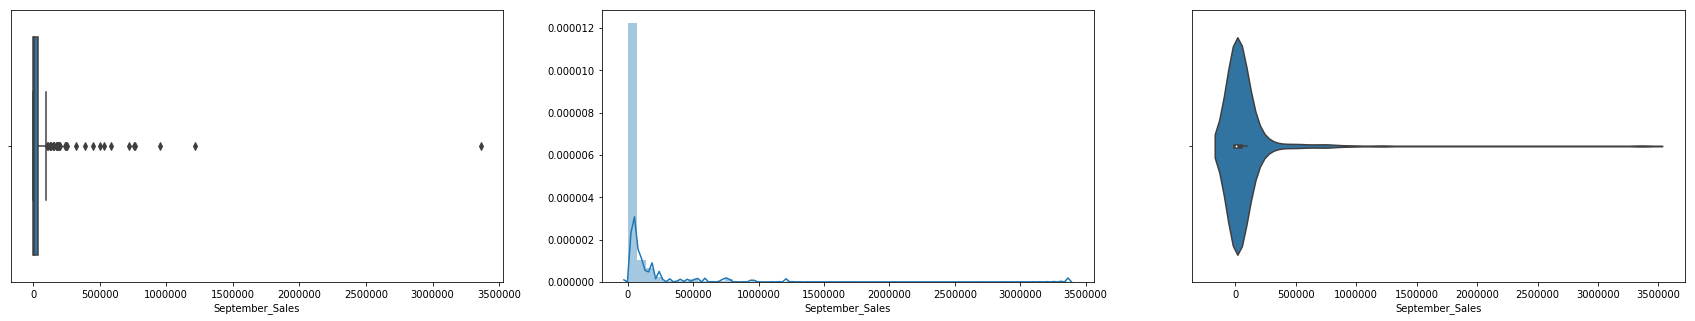



Total no. of entries :  247

The value for left whisker =  -58920.0

Datapoints before left whisker : 
False    247
Name: September_Sales, dtype: int64

The value for right whisker =  99756.0

Datapoints before right whisker : 
False    215
True      32
Name: September_Sales, dtype: int64

************************************Univariate Analysis**************************************************


count    2.470000e+02
mean     7.408951e+04
std      2.944270e+05
min      3.100000e+01
25%      6.305000e+02
50%      3.768000e+03
75%      4.104250e+04
max      3.966541e+06
Name: October_Sales, dtype: float64




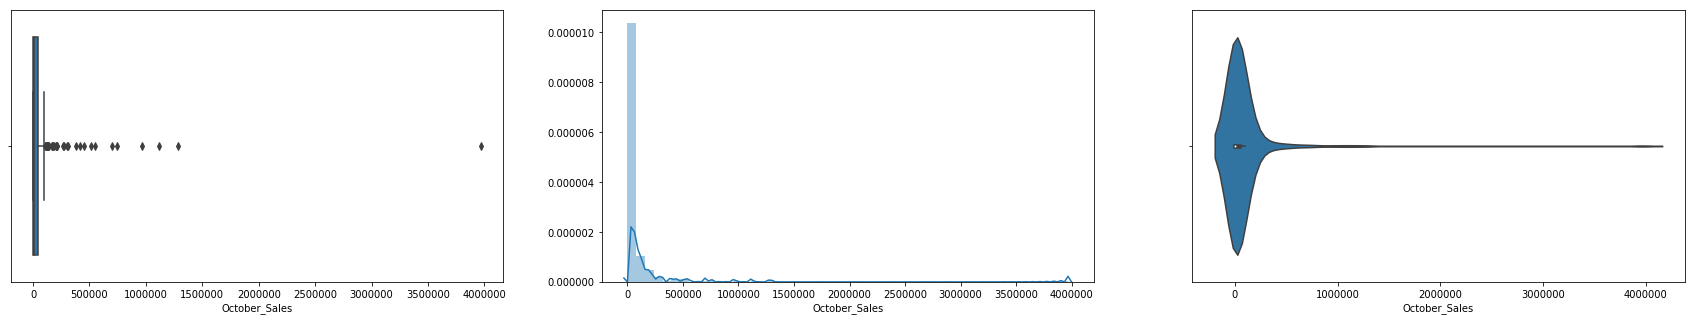



Total no. of entries :  247

The value for left whisker =  -59987.5

Datapoints before left whisker : 
False    247
Name: October_Sales, dtype: int64

The value for right whisker =  101660.5

Datapoints before right whisker : 
False    213
True      34
Name: October_Sales, dtype: int64

************************************Univariate Analysis**************************************************


count    2.470000e+02
mean     7.268832e+04
std      2.862228e+05
min      3.000000e+01
25%      6.125000e+02
50%      3.550000e+03
75%      4.180400e+04
max      3.793029e+06
Name: November_Sales, dtype: float64




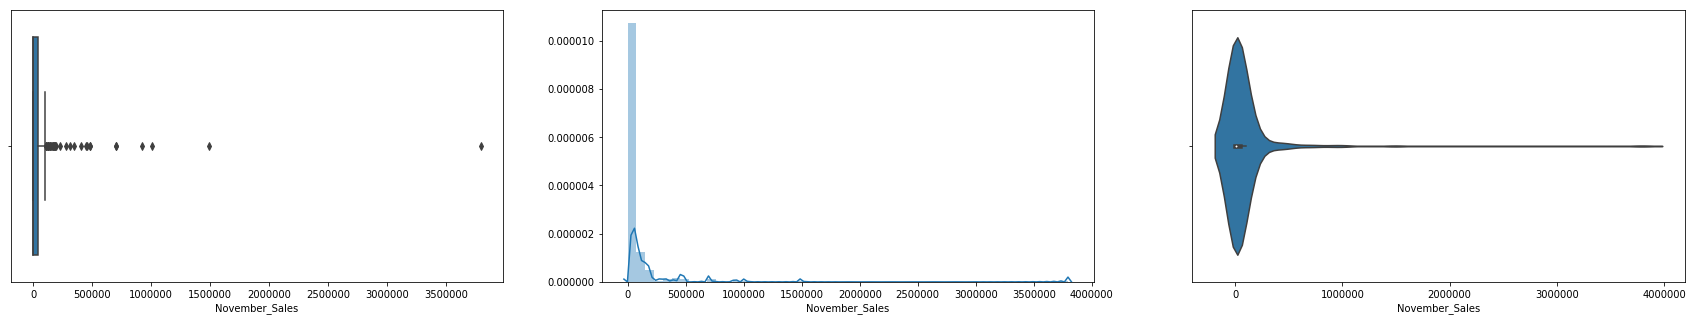



Total no. of entries :  247

The value for left whisker =  -61174.75

Datapoints before left whisker : 
False    247
Name: November_Sales, dtype: int64

The value for right whisker =  103591.25

Datapoints before right whisker : 
False    213
True      34
Name: November_Sales, dtype: int64

************************************Univariate Analysis**************************************************


count    2.470000e+02
mean     7.909421e+04
std      3.348857e+05
min      3.100000e+01
25%      5.870000e+02
50%      3.494000e+03
75%      4.614350e+04
max      4.683580e+06
Name: December_Sales, dtype: float64




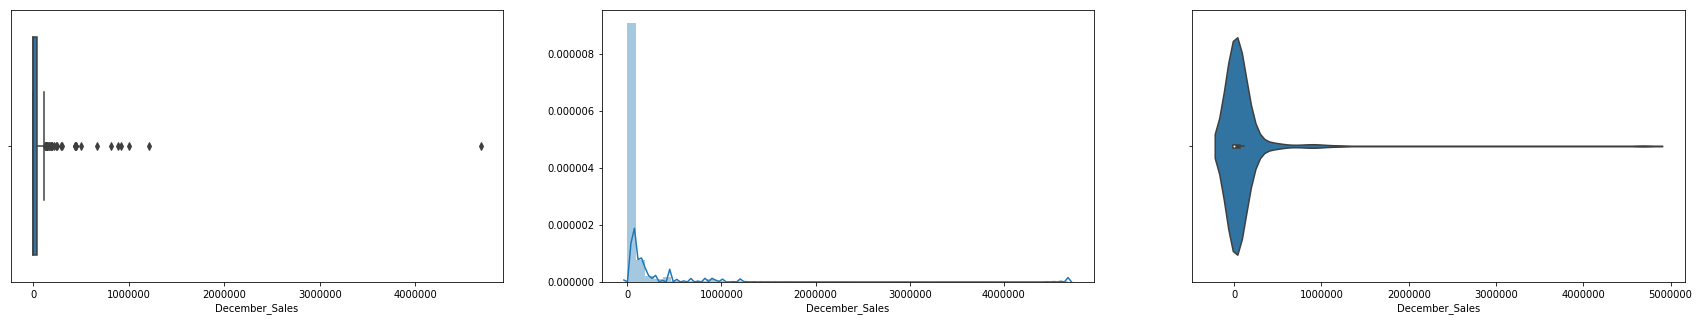



Total no. of entries :  247

The value for left whisker =  -67747.75

Datapoints before left whisker : 
False    247
Name: December_Sales, dtype: int64

The value for right whisker =  114478.25

Datapoints before right whisker : 
False    215
True      32
Name: December_Sales, dtype: int64

************************************Univariate Analysis**************************************************


count    2.470000e+02
mean     7.761174e+04
std      3.378473e+05
min      3.100000e+01
25%      6.485000e+02
50%      3.499000e+03
75%      4.526750e+04
max      4.810524e+06
Name: January_Sales, dtype: float64




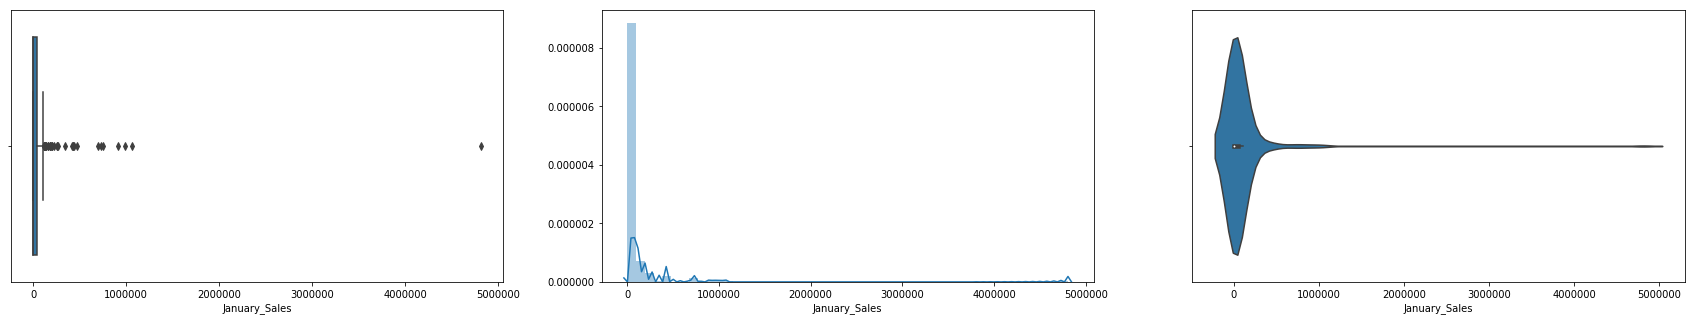



Total no. of entries :  247

The value for left whisker =  -66280.0

Datapoints before left whisker : 
False    247
Name: January_Sales, dtype: int64

The value for right whisker =  112196.0

Datapoints before right whisker : 
False    212
True      35
Name: January_Sales, dtype: int64

************************************Univariate Analysis**************************************************


count    2.470000e+02
mean     7.276703e+04
std      3.437153e+05
min      2.900000e+01
25%      6.460000e+02
50%      3.093000e+03
75%      3.839300e+04
max      5.022127e+06
Name: February_Sales, dtype: float64




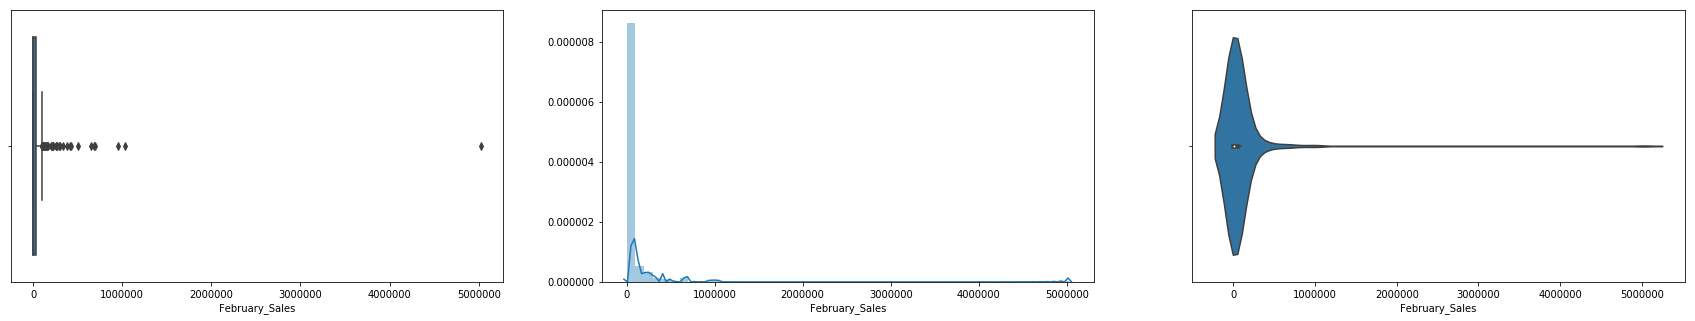



Total no. of entries :  247

The value for left whisker =  -55974.5

Datapoints before left whisker : 
False    247
Name: February_Sales, dtype: int64

The value for right whisker =  95013.5

Datapoints before right whisker : 
False    212
True      35
Name: February_Sales, dtype: int64

************************************Univariate Analysis**************************************************


count    2.470000e+02
mean     8.192134e+04
std      4.128300e+05
min      3.100000e+01
25%      7.265000e+02
50%      3.320000e+03
75%      3.958350e+04
max      6.041703e+06
Name: March_Sales, dtype: float64




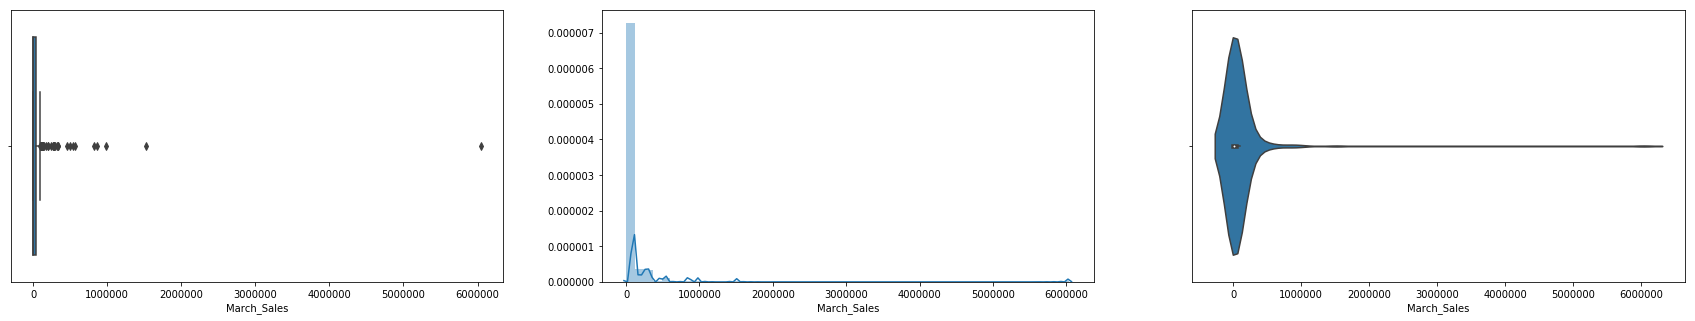



Total no. of entries :  247

The value for left whisker =  -57559.0

Datapoints before left whisker : 
False    247
Name: March_Sales, dtype: int64

The value for right whisker =  97869.0

Datapoints before right whisker : 
False    211
True      36
Name: March_Sales, dtype: int64

************************************Univariate Analysis**************************************************


count    2.470000e+02
mean     7.734199e+04
std      3.437310e+05
min      3.000000e+01
25%      6.705000e+02
50%      3.104000e+03
75%      3.925400e+04
max      4.682819e+06
Name: April_Sales, dtype: float64




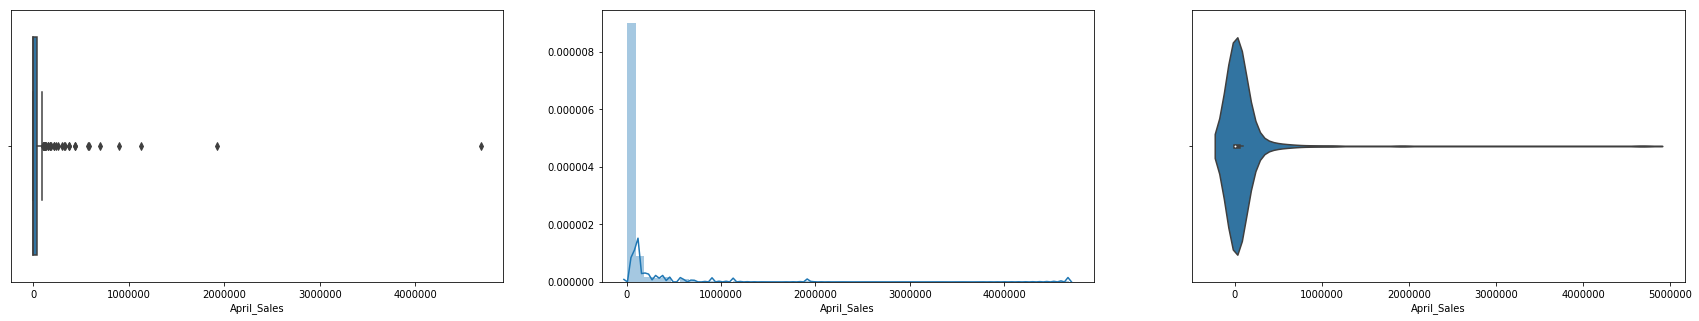



Total no. of entries :  247

The value for left whisker =  -57204.75

Datapoints before left whisker : 
False    247
Name: April_Sales, dtype: int64

The value for right whisker =  97129.25

Datapoints before right whisker : 
False    211
True      36
Name: April_Sales, dtype: int64

************************************Univariate Analysis**************************************************


count    2.470000e+02
mean     7.512529e+04
std      3.060092e+05
min      3.100000e+01
25%      7.245000e+02
50%      2.985000e+03
75%      3.872700e+04
max      3.795832e+06
Name: May_Sales, dtype: float64




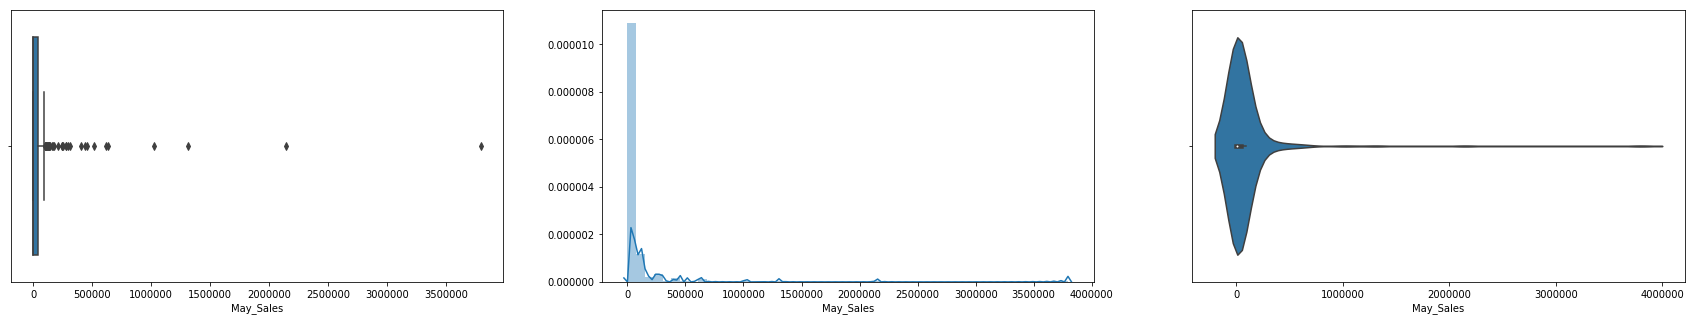



Total no. of entries :  247

The value for left whisker =  -56279.25

Datapoints before left whisker : 
False    247
Name: May_Sales, dtype: int64

The value for right whisker =  95730.75

Datapoints before right whisker : 
False    210
True      37
Name: May_Sales, dtype: int64

************************************Univariate Analysis**************************************************


count    2.470000e+02
mean     7.410336e+04
std      2.961998e+05
min      3.000000e+01
25%      6.810000e+02
50%      2.860000e+03
75%      3.832650e+04
max      3.548522e+06
Name: June_Sales, dtype: float64




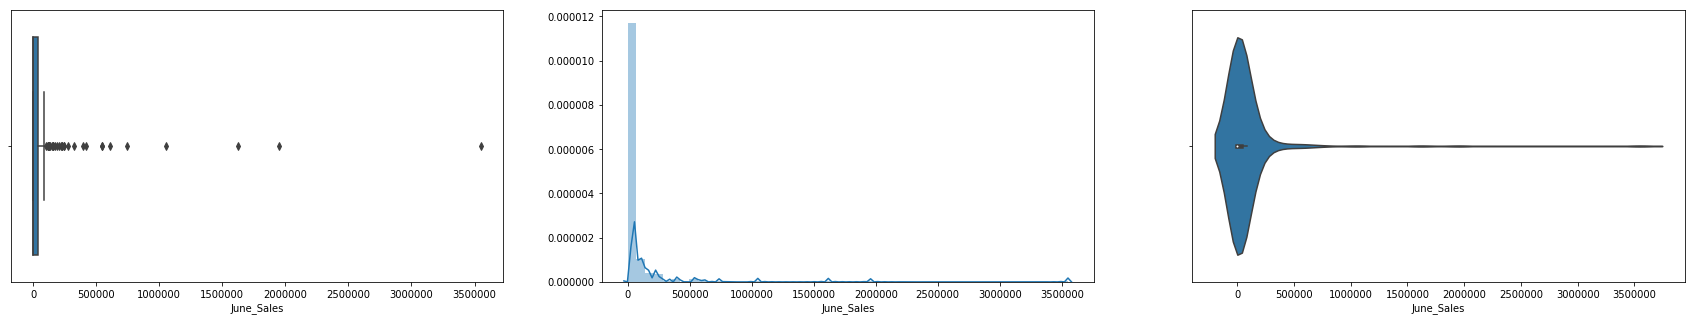



Total no. of entries :  247

The value for left whisker =  -55787.25

Datapoints before left whisker : 
False    247
Name: June_Sales, dtype: int64

The value for right whisker =  94794.75

Datapoints before right whisker : 
False    213
True      34
Name: June_Sales, dtype: int64

************************************Univariate Analysis**************************************************


count    2.470000e+02
mean     7.609624e+04
std      3.030392e+05
min      3.100000e+01
25%      7.080000e+02
50%      2.756000e+03
75%      4.025600e+04
max      3.620162e+06
Name: July_Sales, dtype: float64




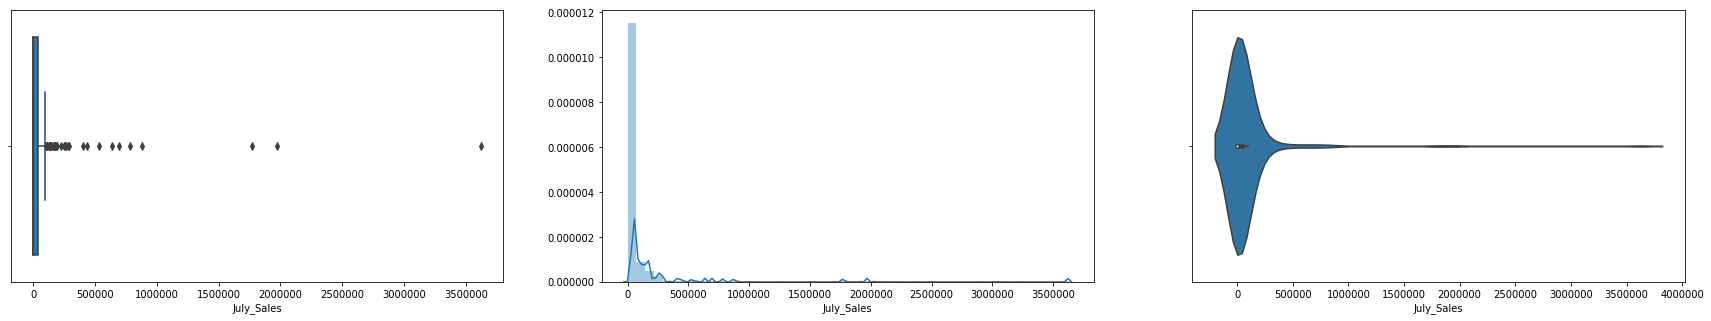



Total no. of entries :  247

The value for left whisker =  -58614.0

Datapoints before left whisker : 
False    247
Name: July_Sales, dtype: int64

The value for right whisker =  99578.0

Datapoints before right whisker : 
False    213
True      34
Name: July_Sales, dtype: int64



August_Sales       None
September_Sales    None
October_Sales      None
November_Sales     None
December_Sales     None
January_Sales      None
February_Sales     None
March_Sales        None
April_Sales        None
May_Sales          None
June_Sales         None
July_Sales         None
dtype: object

In [67]:
copy_data.apply(eda)